### 1. Загрузка и предварительный анализ данных

In [ ]:
# Импорт необходимых модулей, классов и функций

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузка исторических данных

history_df = pd.read_excel('data/schedule_dataset.xlsx')
history_df.head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время отправления фактическое,Время прибытия по расписанию,Время прибытия фактическое
0,2018-03-01,1,MOW,ARH,1,2018-03-01 00:05:00,2018-02-28 23:48:00,2018-03-01 02:00:00,2018-03-01 01:48:00
1,2018-03-01,2,MOW,EGO,2,2018-03-01 00:05:00,2018-03-01 00:00:00,2018-03-01 01:30:00,2018-03-01 01:55:00
2,2018-03-01,3,MOW,AKX,3,2018-03-01 00:15:00,2018-03-01 00:14:00,2018-03-01 02:40:00,2018-03-01 02:32:00
3,2018-03-01,4,LED,MOW,4,2018-03-01 00:20:00,2018-03-01 00:11:00,2018-03-01 01:35:00,2018-03-01 01:39:00
4,2018-03-01,5,MOW,KRR,5,2018-03-01 00:25:00,2018-03-01 00:21:00,2018-03-01 02:40:00,2018-03-01 02:41:00


In [ ]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139732 entries, 0 to 139731
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Дата рейса                       139732 non-null  datetime64[ns]
 1   Рейс                             139732 non-null  int64         
 2   А/П отправл                      139732 non-null  object        
 3   А/П прибыт                       139732 non-null  object        
 4   Номер ВС                         139732 non-null  int64         
 5   Время отправления по расписанию  139732 non-null  datetime64[ns]
 6   Время отправления фактическое    139732 non-null  datetime64[ns]
 7   Время прибытия по расписанию     139732 non-null  datetime64[ns]
 8   Время прибытия фактическое       139732 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2), object(2)
memory usage: 9.6+ MB


In [ ]:
# Отсортируем информацию о рейсах в хронологическом порядке

history_df = history_df.sort_values(by='Дата рейса', ignore_index=True, ascending=False)
history_df

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время отправления фактическое,Время прибытия по расписанию,Время прибытия фактическое
0,2018-09-03,166,MOW,BCN,96,2018-09-03 07:35:00,2018-09-03 07:33:00,2018-09-03 12:05:00,2018-09-03 12:00:00
1,2018-09-03,221,LED,MOW,25,2018-09-03 09:20:00,2018-09-03 09:12:00,2018-09-03 10:40:00,2018-09-03 10:34:00
2,2018-09-03,733,MOW,IAD,206,2018-09-03 09:35:00,2018-09-03 09:27:00,2018-09-03 19:55:00,2018-09-03 19:49:00
3,2018-09-03,187,MOW,TLV,143,2018-09-03 09:30:00,2018-09-03 09:23:00,2018-09-03 13:35:00,2018-09-03 13:28:00
4,2018-09-03,638,SIP,AER,208,2018-09-03 09:30:00,2018-09-03 09:16:00,2018-09-03 10:50:00,2018-09-03 10:45:00
...,...,...,...,...,...,...,...,...,...
139727,2018-03-01,442,LED,MOW,71,2018-03-01 16:20:00,2018-03-01 16:21:00,2018-03-01 17:45:00,2018-03-01 17:41:00
139728,2018-03-01,441,FCO,MOW,101,2018-03-01 16:20:00,2018-03-01 16:17:00,2018-03-01 20:10:00,2018-03-01 20:11:00
139729,2018-03-01,440,HAJ,MOW,45,2018-03-01 16:20:00,2018-03-01 16:09:00,2018-03-01 19:15:00,2018-03-01 19:15:00
139730,2018-03-01,439,RIX,MOW,167,2018-03-01 16:20:00,2018-03-01 16:17:00,2018-03-01 18:05:00,2018-03-01 18:31:00


In [ ]:
# Определдим некоторую справочную информацию

uniq_flights = set(history_df['Рейс'])
num_uniq_flight = len(uniq_flights)
uniq_airports = set(history_df['А/П отправл']) | set(history_df['А/П прибыт'])
num_uniq_airports = len(uniq_airports)
uniq_aircrafts = set(history_df['Номер ВС'])
num_uniq_aircrafts = len(uniq_aircrafts)

print(f'Количество рейсов: {num_uniq_flight}')
print(f'Количество аэропортов: {num_uniq_airports}')
print(f'Количество ВС: {num_uniq_aircrafts}')

Количество рейсов: 1074
Количество аэропортов: 158
Количество ВС: 246


In [ ]:
# Классифицируем каждый вылет исходя из разницы запланированного и фактического времени вылета безотносительно времени задержки

# 0 - вылет состоялся вовремя
# 1 - вылет задержан

history_df["target"] = history_df[
    ["Время отправления фактическое", "Время отправления по расписанию"]
].apply(
    lambda row: (
        1
        if row["Время отправления фактическое"] > row["Время отправления по расписанию"]
        else 0
    ),
    axis=1,
)

In [ ]:
history_df.loc[history_df['target'] == 0].head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время отправления фактическое,Время прибытия по расписанию,Время прибытия фактическое,target
0,2018-09-03,166,MOW,BCN,96,2018-09-03 07:35:00,2018-09-03 07:33:00,2018-09-03 12:05:00,2018-09-03 12:00:00,0
1,2018-09-03,221,LED,MOW,25,2018-09-03 09:20:00,2018-09-03 09:12:00,2018-09-03 10:40:00,2018-09-03 10:34:00,0
2,2018-09-03,733,MOW,IAD,206,2018-09-03 09:35:00,2018-09-03 09:27:00,2018-09-03 19:55:00,2018-09-03 19:49:00,0
3,2018-09-03,187,MOW,TLV,143,2018-09-03 09:30:00,2018-09-03 09:23:00,2018-09-03 13:35:00,2018-09-03 13:28:00,0
4,2018-09-03,638,SIP,AER,208,2018-09-03 09:30:00,2018-09-03 09:16:00,2018-09-03 10:50:00,2018-09-03 10:45:00,0


In [ ]:
history_df.loc[history_df['target'] == 1].head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время отправления фактическое,Время прибытия по расписанию,Время прибытия фактическое,target
28,2018-09-03,247,MOW,AER,72,2018-09-03 09:00:00,2018-09-03 10:18:00,2018-09-03 11:30:00,2018-09-03 12:59:00,1
36,2018-09-03,266,MOW,VIE,198,2018-09-03 09:10:00,2018-09-03 09:49:00,2018-09-03 12:00:00,2018-09-03 12:39:00,1
39,2018-09-03,96,PEE,MOW,34,2018-09-03 04:30:00,2018-09-03 10:38:00,2018-09-03 06:40:00,2018-09-03 12:56:00,1
40,2018-09-03,237,MOW,JFK,116,2018-09-03 09:20:00,2018-09-03 10:06:00,2018-09-03 19:05:00,2018-09-03 19:46:00,1
49,2018-09-03,211,MOW,TLL,221,2018-09-03 08:55:00,2018-09-03 08:57:00,2018-09-03 10:35:00,2018-09-03 10:55:00,1


In [ ]:
num_delay = (history_df['target'] == 1).sum()
print(f'Абсолютное количество задержанных вылетов {num_delay}')
print(f'Относительное количество задержанных вылетов {num_delay / len(history_df):.2f}')

Абсолютное количество задержанных вылетов 19132
Относительное количество задержанных вылетов 0.14


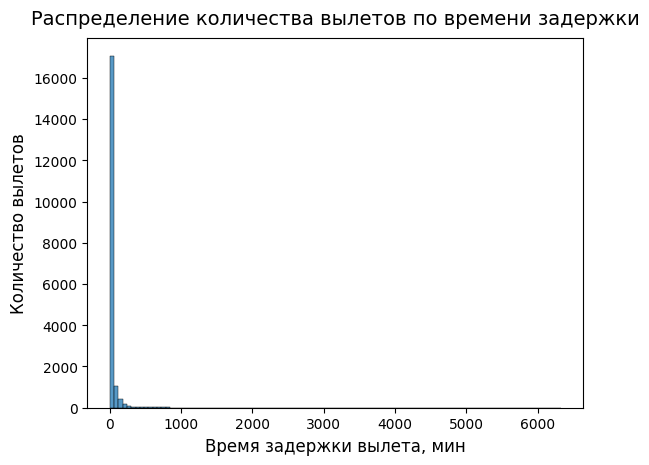

In [ ]:
# Построим гистограмму задержек вылетов

dif = (
    (
        history_df["Время отправления фактическое"]
        - history_df["Время отправления по расписанию"]
    )
    .loc[history_df["target"] == 1]
    .dt.total_seconds() / 60
).round().astype(np.int32)

sns.histplot(dif, binwidth=60.0)
plt.title('Распределение количества вылетов по времени задержки', pad=10, size=14)
plt.xlabel('Время задержки вылета, мин', size = 12)
plt.ylabel('Количество вылетов', size = 12)
plt.show()

In [ ]:
dif.groupby(dif > 180).count()

False    18530
True       602
dtype: int64

Из распределения видно, что в основном вылеты задерживают не более чем на 3 часа. При этом в подавляющем большинстве случаев задержка не продлится более 1 часа

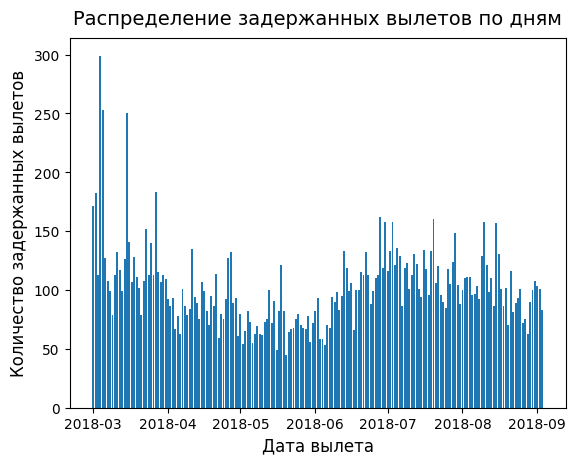

In [ ]:
# Оценим распределение задержанных рейсов по дням

num_daily_delays = (
    history_df[["Дата рейса", "target"]]
    .loc[history_df["target"] == 1]
    .groupby("Дата рейса")
    .count()
    .sort_values("Дата рейса", ascending=False)
    .rename(columns={"target": "count"})
)

plt.bar(num_daily_delays.index, num_daily_delays["count"])
plt.title("Распределение задержанных вылетов по дням", pad=10, size=14)
plt.xlabel("Дата вылета", size=12)
plt.ylabel("Количество задержанных вылетов", size=12)
plt.show()

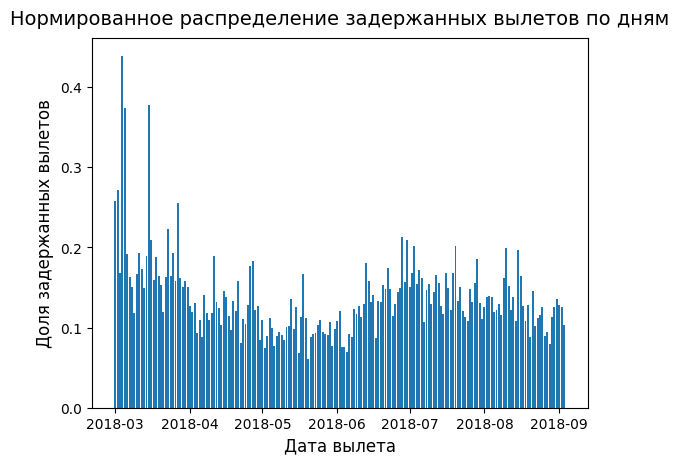

In [ ]:
# Оценим распределение задержанных рейсов по дням нормированное на количество вылетов в день

norm_daily_delays = (
    (
        history_df[["Дата рейса", "target"]]
        .loc[history_df["target"] == 1]
        .groupby("Дата рейса")
        .count()
        .sort_values("Дата рейса", ascending=False)
    )
    / (
        history_df[["Дата рейса", "target"]]
        .groupby("Дата рейса")
        .count()
        .sort_values("Дата рейса", ascending=False)
    )
).rename(columns={"target": "norm_count"})

plt.bar(norm_daily_delays.index, norm_daily_delays["norm_count"])
plt.title("Нормированное распределение задержанных вылетов по дням", pad=10, size=14)
plt.xlabel("Дата вылета", size=12)
plt.ylabel("Доля задержанных вылетов", size=12)
plt.show()

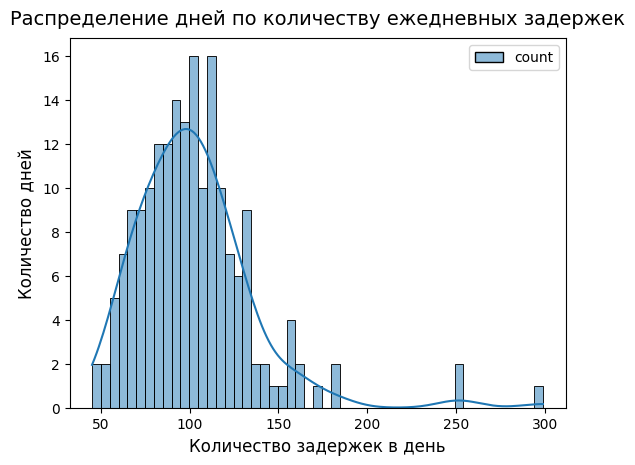

In [ ]:
# Распределение дней по количеству ежедневных задержек

sns.histplot(num_daily_delays, binwidth=5, kde=True)
plt.title("Распределение дней по количеству ежедневных задержек", pad=10, size=14)
plt.xlabel("Количество задержек в день", size=12)
plt.ylabel("Количество дней", size=12)
plt.show()

In [ ]:
print(f'Минимальное количестов задержек за день: {num_daily_delays["count"].min()}')
print(f'Максимальное количестов задержек за день: {num_daily_delays["count"].max()}')

Минимальное количестов задержек за день: 45
Максимальное количестов задержек за день: 299


Из представленных выше графиков можно сделать следующие выводы:

1. Количество задержек в день инвариантно относительно количества вылетов в день;
2. Определенное количество вылетов в любом случае будет задержано, независимо от дня;
3. Чаще всего в день задерживают около 100 вылетов

In [ ]:
# Оценим аналогичные показатели по рейсам, ВС и аэропортам вылета

num_flight_delays = (
    history_df[["Рейс", "target"]]
    .loc[history_df["target"] == 1]
    .groupby("Рейс")
    .count()
    .rename(columns={"target": "count"})
)

norm_flight_delays = (
    (
        history_df[["Рейс", "target"]]
        .loc[history_df["target"] == 1]
        .groupby("Рейс")
        .count()
    )
    / (
        history_df[["Рейс", "target"]]
        .groupby("Рейс")
        .count()
    )
).rename(columns={"target": "norm_count"})

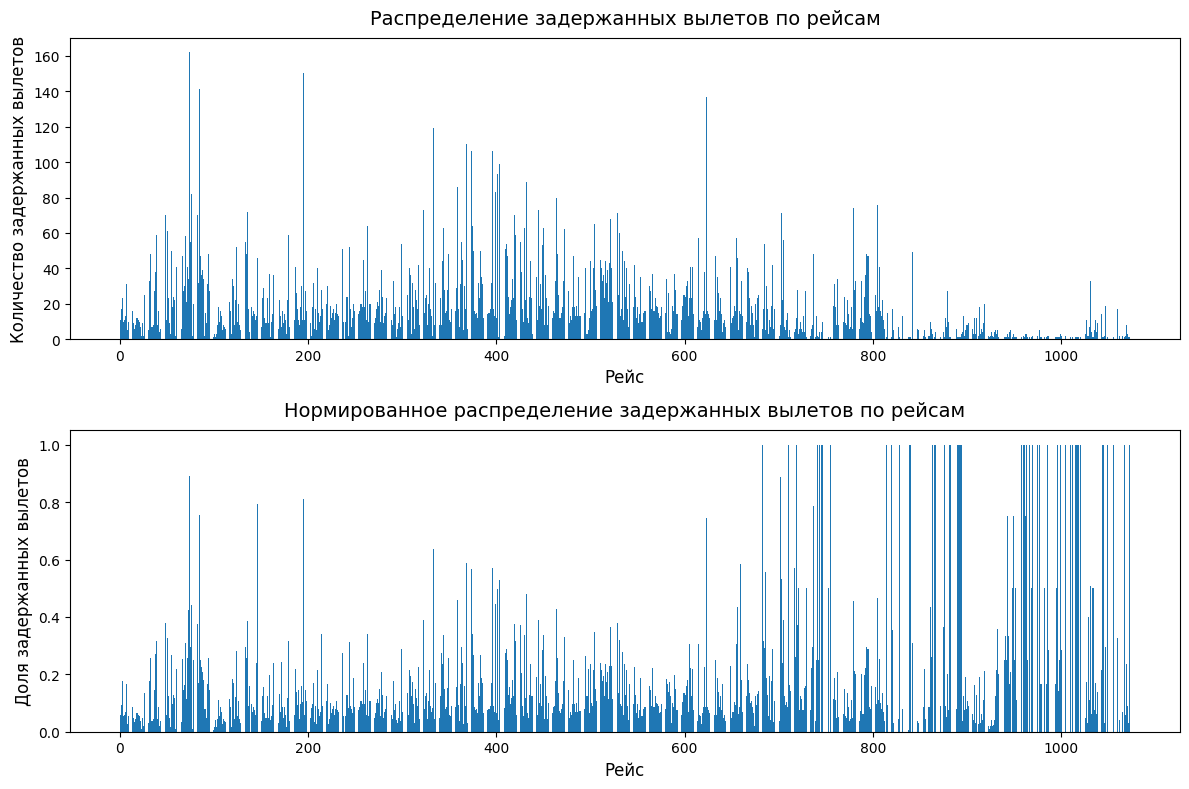

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.bar(num_flight_delays.index, num_flight_delays["count"])
plt.title("Распределение задержанных вылетов по рейсам", pad=10, size=14)
plt.xlabel("Рейс", size=12)
plt.ylabel("Количество задержанных вылетов", size=12)

plt.subplot(212)
plt.bar(norm_flight_delays.index, norm_flight_delays["norm_count"])
plt.title("Нормированное распределение задержанных вылетов по рейсам", pad=10, size=14)
plt.xlabel("Рейс", size=12)
plt.ylabel("Доля задержанных вылетов", size=12)

plt.tight_layout()
plt.show()

In [ ]:
print(f'Минимальное количестов задержек по рейсу: {num_flight_delays["count"].min()}')
print(f'Максимальное количестов задержек по рейсу: {num_flight_delays["count"].max()}')

Минимальное количестов задержек по рейсу: 1
Максимальное количестов задержек по рейсу: 162


In [ ]:
num_aircrafts_delays = (
    history_df[["Номер ВС", "target"]]
    .loc[history_df["target"] == 1]
    .groupby("Номер ВС")
    .count()
    .rename(columns={"target": "count"})
)

norm_aircrafts_delays = (
    (
        history_df[["Номер ВС", "target"]]
        .loc[history_df["target"] == 1]
        .groupby("Номер ВС")
        .count()
    )
    / (
        history_df[["Номер ВС", "target"]]
        .groupby("Номер ВС")
        .count()
    )
).rename(columns={"target": "norm_count"})

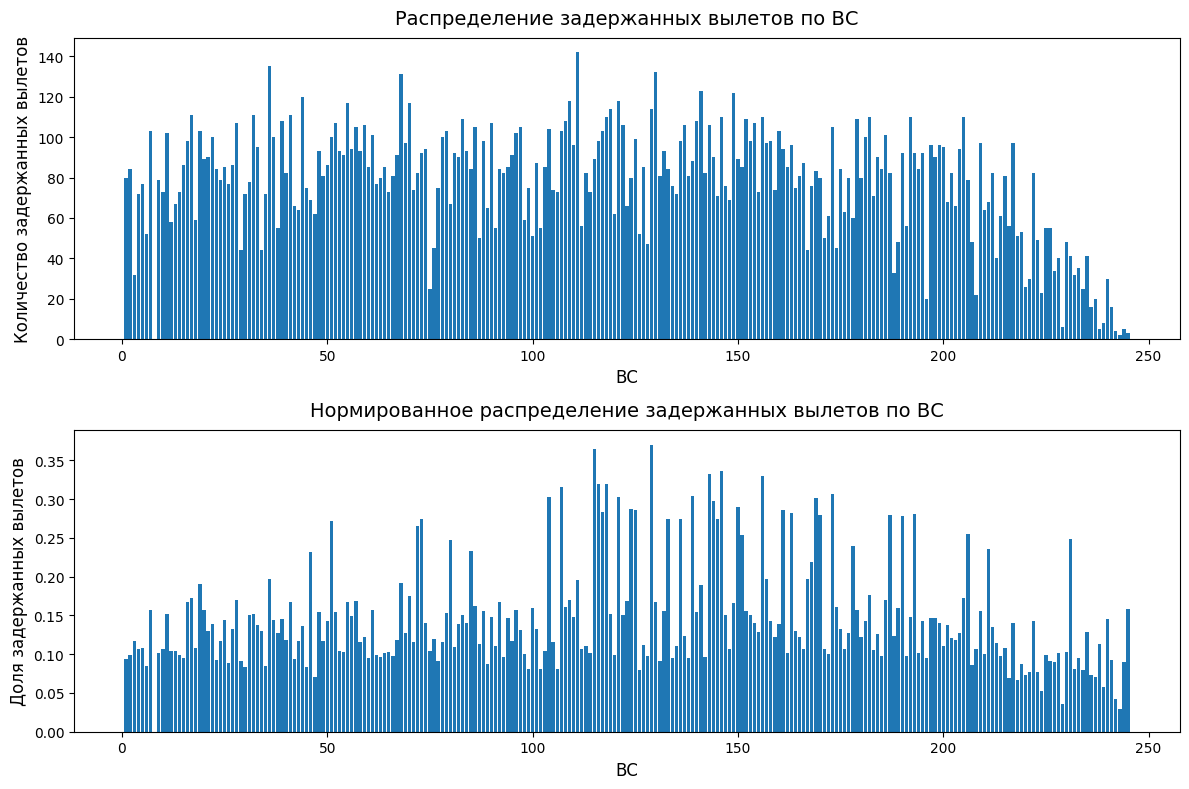

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.bar(num_aircrafts_delays.index, num_aircrafts_delays["count"])
plt.title("Распределение задержанных вылетов по ВС", pad=10, size=14)
plt.xlabel("ВС", size=12)
plt.ylabel("Количество задержанных вылетов", size=12)

plt.subplot(212)
plt.bar(norm_aircrafts_delays.index, norm_aircrafts_delays["norm_count"])
plt.title("Нормированное распределение задержанных вылетов по ВС", pad=10, size=14)
plt.xlabel("ВС", size=12)
plt.ylabel("Доля задержанных вылетов", size=12)

plt.tight_layout()
plt.show()

In [ ]:
print(f'Минимальное количестов задержек по ВС: {num_aircrafts_delays["count"].min()}')
print(f'Максимальное количестов задержек по ВС: {num_aircrafts_delays["count"].max()}')

Минимальное количестов задержек по ВС: 2
Максимальное количестов задержек по ВС: 142


In [ ]:
num_airports_delays = (
    history_df[["А/П отправл", "target"]]
    .loc[history_df["target"] == 1]
    .groupby("А/П отправл")
    .count()
    .rename(columns={"target": "count"})
)

norm_airports_delays = (
    (
        history_df[["А/П отправл", "target"]]
        .loc[history_df["target"] == 1]
        .groupby("А/П отправл")
        .count()
    )
    / (
        history_df[["А/П отправл", "target"]]
        .groupby("А/П отправл")
        .count()
    )
).rename(columns={"target": "norm_count"})

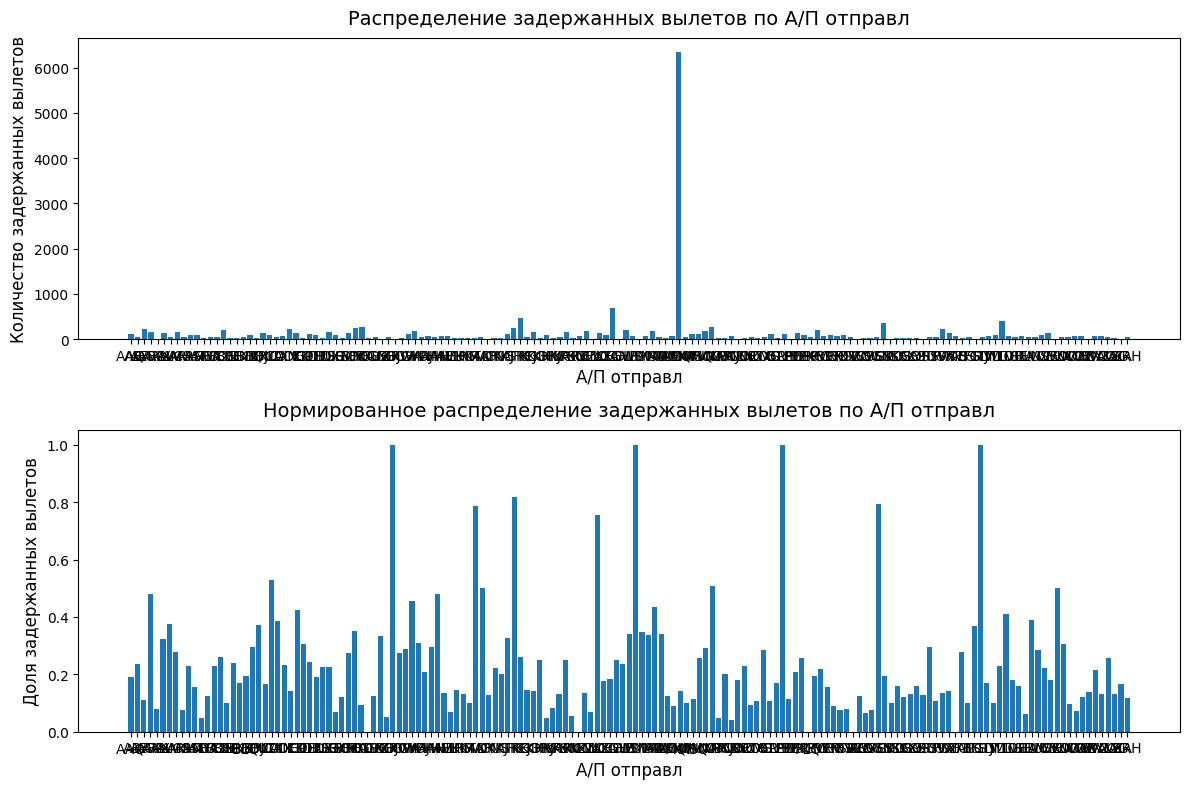

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.bar(num_airports_delays.index, num_airports_delays["count"])
plt.title("Распределение задержанных вылетов по А/П отправл", pad=10, size=14)
plt.xlabel("А/П отправл", size=12)
plt.ylabel("Количество задержанных вылетов", size=12)

plt.subplot(212)
plt.bar(norm_airports_delays.index, norm_airports_delays["norm_count"])
plt.title(
    "Нормированное распределение задержанных вылетов по А/П отправл", pad=10, size=14
)
plt.xlabel("А/П отправл", size=12)
plt.ylabel("Доля задержанных вылетов", size=12)

plt.tight_layout()
plt.show()

In [ ]:
print(f'Минимальное количестов задержек по А/П отправл: {num_airports_delays["count"].min()}')
print(f'Максимальное количестов задержек по А/П отправл: {num_airports_delays["count"].max()}')

Минимальное количестов задержек по А/П отправл: 1
Максимальное количестов задержек по А/П отправл: 6339


Из представленных выше данным можно сделать следующие выводы:

1. Задержки по аэропортам, рейсам и ВС распределены неравномерно как в абсолютных так и в относительных значениях;
2. Существуют аэропорты и рейсы вылеты по которым почти всегда задерживаются. Влзможно, это связано с малочисленностью таких вылетов;
3. В представленном датасете не существуе рейса, аэропорта или ВС, по которому не было задержано ни одног рейса.

Так же следует отметить отсутствие пропущенных значений и значений, которые можно было бы интерпретировать как выбросы.

Перед переходом к этапу предобработки данных, следует подготовить датасет:

1. Убрать информацию, неизвестную на момент предсказания задержки;
2. Разбить время отправления по расписанию на день года и время суток выраженных в минутах от полуночи. Таким образом можно будет дать возможность модели учесть сезонные и временные особенности (если они есть) в подходящем формате представления данных;
3. Выделить записи за последние 2 дня в качестве тестовой (отложенной) и валидационной выборки;
4. Удалить столбец с датой рейса как избыточную информацию.

In [ ]:
histrory_df_modify = history_df.assign(
    depart_day_of_year=history_df["Время отправления по расписанию"].dt.day_of_year,
    depart_time=history_df["Время отправления по расписанию"].dt.time,
    arr_day_of_year=history_df["Время прибытия по расписанию"].dt.day_of_year,
    arr_time=history_df["Время прибытия по расписанию"].dt.time,
).drop(
    columns=[
        "Время отправления фактическое",
        "Время прибытия фактическое",
        "Время отправления по расписанию",
        "Время прибытия по расписанию",
    ]
)

In [ ]:
histrory_df_modify.head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,target,depart_day_of_year,depart_time,arr_day_of_year,arr_time
0,2018-09-03,166,MOW,BCN,96,0,246,07:35:00,246,12:05:00
1,2018-09-03,221,LED,MOW,25,0,246,09:20:00,246,10:40:00
2,2018-09-03,733,MOW,IAD,206,0,246,09:35:00,246,19:55:00
3,2018-09-03,187,MOW,TLV,143,0,246,09:30:00,246,13:35:00
4,2018-09-03,638,SIP,AER,208,0,246,09:30:00,246,10:50:00


In [ ]:
from datetime import timedelta

def time_to_minutes(time):
    time = time.strftime('%H:%M:%S')
    hours, minutes, seconds = map(int, time.split(':'))
    delta = timedelta(hours=hours, minutes=minutes, seconds=seconds)
    return int(delta.total_seconds() // 60)

In [ ]:
histrory_df_modify['depart_time'] = histrory_df_modify['depart_time'].apply(time_to_minutes)
histrory_df_modify['arr_time'] = histrory_df_modify['arr_time'].apply(time_to_minutes)

In [ ]:
histrory_df_modify.head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,target,depart_day_of_year,depart_time,arr_day_of_year,arr_time
0,2018-09-03,166,MOW,BCN,96,0,246,455,246,725
1,2018-09-03,221,LED,MOW,25,0,246,560,246,640
2,2018-09-03,733,MOW,IAD,206,0,246,575,246,1195
3,2018-09-03,187,MOW,TLV,143,0,246,570,246,815
4,2018-09-03,638,SIP,AER,208,0,246,570,246,650


In [ ]:
test_day = histrory_df_modify['Дата рейса'].unique()[0]

In [ ]:
test_df = histrory_df_modify.loc[histrory_df_modify['Дата рейса'] == test_day].drop(columns='Дата рейса')
train_df = histrory_df_modify.loc[histrory_df_modify['Дата рейса'] != test_day].drop(columns='Дата рейса')

In [ ]:
test_df.head()

,Рейс,А/П отправл,А/П прибыт,Номер ВС,target,depart_day_of_year,depart_time,arr_day_of_year,arr_time
0,166,MOW,BCN,96,0,246,455,246,725
1,221,LED,MOW,25,0,246,560,246,640
2,733,MOW,IAD,206,0,246,575,246,1195
3,187,MOW,TLV,143,0,246,570,246,815
4,638,SIP,AER,208,0,246,570,246,650


In [ ]:
train_df.head()

,Рейс,А/П отправл,А/П прибыт,Номер ВС,target,depart_day_of_year,depart_time,arr_day_of_year,arr_time
800,904,RTW,MOW,196,0,245,565,245,660
801,252,MOW,SIP,44,0,245,560,245,720
802,210,MOW,OTP,171,0,245,560,245,750
803,221,LED,MOW,233,0,245,560,245,640
804,241,MOW,AMS,211,0,245,565,245,780


In [ ]:
print(f'Количество образцов в тренировочном наборе: {len(train_df)}')
print(f'Количество образцов в тестовом наборе: {len(test_df)}')

Количество образцов в тренировочном наборе: 138932
Количество образцов в тестовом наборе: 800


### 2. Обучение модели

#### 2.1. Препроцессинг

In [ ]:
# Импорт необходимых модулей, классов, функций

from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import TruncatedSVD

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from pandas import DataFrame
from numpy.typing import ArrayLike

RANDOM_STATE = 42

In [ ]:
# Оценим корреляцию между признаками и целевой переменной. Для этого необходимо закодировать аэропорты числовыми значениями

encoder = LabelEncoder()
train_df_encode = train_df.copy()
train_df_encode['А/П отправл'] = encoder.fit_transform(train_df_encode['А/П отправл'])
train_df_encode['А/П прибыт'] = encoder.fit_transform(train_df_encode['А/П прибыт'])

train_df_encode.head()

,Рейс,А/П отправл,А/П прибыт,Номер ВС,target,depart_day_of_year,depart_time,arr_day_of_year,arr_time
800,904,112,86,196,0,245,565,245,660
801,252,85,119,44,0,245,560,245,720
802,210,85,101,171,0,245,560,245,750
803,221,75,86,233,0,245,560,245,640
804,241,85,7,211,0,245,565,245,780


[]

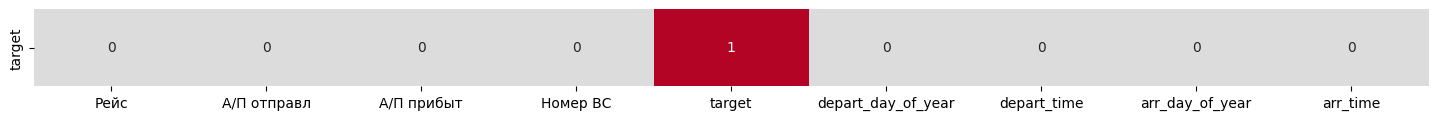

In [ ]:
# В качестве меры корреляции используем метод Хёфдинга хорошо справляющийся с нелинейными немонотонными взаимосвязями

from XtendedCorrel import hoeffding
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

corr = train_df_encode.corr(method=hoeffding).round(2)
plt.figure(figsize=(18, 1))
sns.heatmap(
    data=corr.loc[corr.index == 'target', :],
    cmap="coolwarm",
    annot=True,
    vmin=-1,
    vmax=1,
    square=False,
    cbar=False,
)
plt.plot()

[]

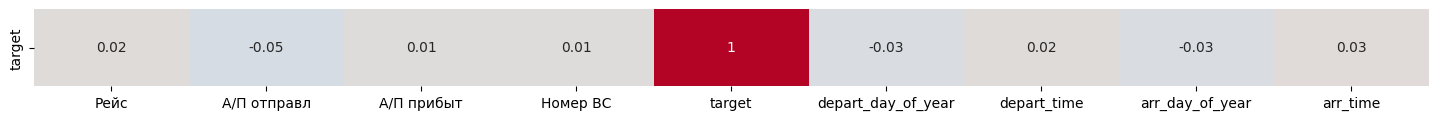

In [ ]:
corr = train_df_encode.corr(method='kendall').round(2)
plt.figure(figsize=(18, 1))
sns.heatmap(
    data=corr.loc[corr.index == 'target', :],
    cmap="coolwarm",
    annot=True,
    vmin=-1,
    vmax=1,
    square=False,
    cbar=False,
)
plt.plot()

Корреляций между признаками и целевой переменной не выявлено. Возможно, это связано с тем, что все признаки в данном случае носят категориальный харрактер

In [ ]:
# Определим класс для удобного препроцессинга во время обучения и прогноза

class Preprocessor:
    def preprocess_for_train(
        self,
        data: DataFrame,
        reduce: bool = True,
        sigm: float = 0.8,
    ) -> list[ArrayLike]:

        self.reduce = reduce
        
        X = data.drop(columns=['target'])
        Y = data["target"].to_numpy()

        categorical_features = X.columns

        ohe = OneHotEncoder(handle_unknown="ignore")
        self.column_transformer = ColumnTransformer(
            transformers=[
                ("cat", ohe, categorical_features),
            ]
        )

        X = self.column_transformer.fit_transform(X)

        if self.reduce:
            X = self.reduce_dim(X, sigm=sigm)

        return X, Y

    def preprocess_for_predict(self, data: DataFrame) -> ArrayLike:
        X = data.drop(columns=['target'])
        Y = data["target"].to_numpy()
        X = self.column_transformer.transform(X)

        if self.reduce:
            X = self.opt_reducer.transform(X)

        return X, Y

    def reduce_dim(self, X, sigm) -> ArrayLike:
        reducer = TruncatedSVD(n_components=X.shape[1], random_state=RANDOM_STATE)
        reducer.fit(X)
        opt_n_pc = np.count_nonzero(np.cumsum(reducer.explained_variance_ratio_) < sigm)
        self.opt_reducer = TruncatedSVD(opt_n_pc, random_state=RANDOM_STATE)

        return self.opt_reducer.fit_transform(X)

In [ ]:
preproc = Preprocessor()
X_train, Y_train = preproc.preprocess_for_train(train_df)

In [ ]:
X_train.shape

(138932, 697)

#### 2.2. Выбор алгоритма

In [ ]:
# В качестве алгоритмов-кандидатов применим HistGradientBoostingClassifier, RandomForestClassifier, LogisticRegression 
# в взвешенном и невзвешенном вариантах, где это опционально доступно

# В качестве метрик качества воспользуемся precision, f-score, roc_auc

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scoring = ['precision', 'f1', 'roc_auc']

gbc = HistGradientBoostingClassifier(random_state=RANDOM_STATE)
rfc = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)
lrc = LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1)

balanced_gbc = HistGradientBoostingClassifier(class_weight='balanced', random_state=RANDOM_STATE)
balanced_rfc = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE, n_jobs=-1)
balanced_lrc = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE, n_jobs=-1)

In [ ]:
def get_scores_df(
    estimators: dict,
    X: DataFrame | ArrayLike,
    y: ArrayLike,
    scoring: list[str],
    cv: int | StratifiedKFold,
) -> DataFrame:
    score_keys = [f"test_{name}" for name in scoring]
    estimator_keys = list(estimators.keys())
    data = []

    for estimator in estimator_keys:
        print(f'Current estimator: {estimator}')
        cur_scores = cross_validate(estimator=estimators[estimator], X=X, y=y, scoring=scoring, cv=cv, n_jobs=-1)
        cur_row = [cur_scores[key].mean() for key in score_keys]
        data.append(cur_row)
    
    return pd.DataFrame(data, index=estimator_keys, columns=score_keys)

In [ ]:
estimators = {
    "gbc": gbc,
    "rfc": rfc,
    "lrc": lrc,
    "balanced_gbc": balanced_gbc,
    "balanced_rfc": balanced_rfc,
    "balanced_lrc": balanced_lrc,
}

default_score_df = get_scores_df(estimators=estimators, X=X_train, y=Y_train, scoring=scoring, cv=kfold)

Current estimator: gbc
Current estimator: rfc
Current estimator: lrc
Current estimator: balanced_gbc
Current estimator: balanced_rfc
Current estimator: balanced_lrc


In [ ]:
default_score_df

,test_precision,test_f1,test_roc_auc
gbc,0.685095,0.135112,0.736041
rfc,0.632788,0.149599,0.720776
lrc,0.641647,0.136493,0.724178
balanced_gbc,0.275060,0.380527,0.738105
balanced_rfc,0.668160,0.130113,0.724966
balanced_lrc,0.248473,0.358928,0.724402


#### 2.3. Оптимизация гиперпараметров

В качестве основной модели для дальнейшей оптимизации принимается HistGradientBoostingClassifier, так как он показал более хорошие метрики в обоих случаях.

In [ ]:
# Попробуем улучшить качество модели с помощью решетчатого поиска

param_grid = {
    "learning_rate": [0.05, 1],
    "max_leaf_nodes": [30, 50],
    'max_depth': [5, 10],
    "max_iter": [200],
}

gs = GridSearchCV(
    estimator=balanced_gbc,
    param_grid=param_grid,
    scoring=scoring,
    n_jobs=5,
    cv=kfold,
    verbose=3,
    refit=False,
    return_train_score=True,
)

In [ ]:
gs.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.05, max_depth=5, max_iter=200, max_leaf_nodes=30; f1: (train=0.441, test=0.379) precision: (train=0.316, test=0.271) roc_auc: (train=0.825, test=0.737) total time= 1.1min
[CV 4/5] END learning_rate=0.05, max_depth=5, max_iter=200, max_leaf_nodes=30; f1: (train=0.442, test=0.382) precision: (train=0.317, test=0.274) roc_auc: (train=0.824, test=0.742) total time= 1.1min
[CV 2/5] END learning_rate=0.05, max_depth=5, max_iter=200, max_leaf_nodes=30; f1: (train=0.440, test=0.376) precision: (train=0.315, test=0.269) roc_auc: (train=0.825, test=0.733) total time= 1.1min
[CV 5/5] END learning_rate=0.05, max_depth=5, max_iter=200, max_leaf_nodes=30; f1: (train=0.440, test=0.371) precision: (train=0.314, test=0.265) roc_auc: (train=0.826, test=0.731) total time= 1.1min
[CV 3/5] END learning_rate=0.05, max_depth=5, max_iter=200, max_leaf_nodes=30; f1: (train=0.441, test=0.379) precision: (train=0.316, test=0

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=HistGradientBoostingClassifier(class_weight='balanced',
                                                      random_state=42),
             n_jobs=5,
             param_grid={'learning_rate': [0.05, 1], 'max_depth': [5, 10],
                         'max_iter': [200], 'max_leaf_nodes': [30, 50]},
             refit=False, return_train_score=True,
             scoring=['precision', 'f1', 'roc_auc'], verbose=3)

In [ ]:
columns = [
    "params",
    "mean_train_precision",
    "mean_test_precision",
    "mean_train_f1",
    "mean_test_f1",
    "mean_train_roc_auc",
    "mean_test_roc_auc",
]

gs_scores_df = pd.DataFrame(gs.cv_results_)[columns]

In [ ]:
pd.set_option('display.max_colwidth', 120)
gs_scores_df.sort_values('mean_test_f1', ascending=False)

,params,mean_train_precision,mean_test_precision,mean_train_f1,mean_test_f1,mean_train_roc_auc,mean_test_roc_auc
3,"{'learning_rate': 0.05, 'max_depth': 10, 'max_iter': 200, 'max_leaf_nodes': 50}",0.348762,0.282456,0.478303,0.386154,0.857195,0.742347
2,"{'learning_rate': 0.05, 'max_depth': 10, 'max_iter': 200, 'max_leaf_nodes': 30}",0.325144,0.275791,0.450555,0.381842,0.833502,0.741062
1,"{'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 200, 'max_leaf_nodes': 50}",0.316912,0.271298,0.442308,0.378147,0.826202,0.736339
0,"{'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 200, 'max_leaf_nodes': 30}",0.315560,0.270262,0.440632,0.377321,0.824863,0.736414
6,"{'learning_rate': 1, 'max_depth': 10, 'max_iter': 200, 'max_leaf_nodes': 30}",0.286909,0.237601,0.409465,0.339099,0.791500,0.694738
5,"{'learning_rate': 1, 'max_depth': 5, 'max_iter': 200, 'max_leaf_nodes': 50}",0.277999,0.234300,0.399213,0.336910,0.780743,0.689976
4,"{'learning_rate': 1, 'max_depth': 5, 'max_iter': 200, 'max_leaf_nodes': 30}",0.277343,0.234899,0.397849,0.336849,0.779125,0.692408
7,"{'learning_rate': 1, 'max_depth': 10, 'max_iter': 200, 'max_leaf_nodes': 50}",0.308155,0.236887,0.436168,0.335040,0.816719,0.689047


Решетчатый поиск не дал значимых результатов. Возможно, варьирование весов классов позволит улучшить качество модели.

In [ ]:
test_gbc = HistGradientBoostingClassifier(
    random_state=RANDOM_STATE,
    learning_rate=0.05,
)

balans = Y_train.shape / (2 * np.bincount(Y_train))
param_grid = {
    "class_weight": [
        {0: balans[0], 1: balans[1] / 1.5},
        {0: balans[0], 1: balans[1] / 2},
        {0: balans[0], 1: balans[1] / 2.5},
        {0: balans[0], 1: balans[1] / 3},
        {0: balans[0], 1: balans[1] / 3.5},
        {0: balans[0], 1: balans[1] * 1.5},
        {0: balans[0], 1: balans[1] * 2},
        {0: balans[0], 1: balans[1] * 2.5},
        {0: balans[0], 1: balans[1] * 3},
        {0: balans[0], 1: balans[1] * 3.5},
        {0: balans[0], 1: balans[1] * 4},
        {0: balans[0], 1: balans[1] * 4.5},
    ]
}

weight_gs = GridSearchCV(
    estimator=test_gbc,
    param_grid=param_grid,
    scoring=["precision", "f1", "roc_auc", "accuracy"],
    n_jobs=5,
    cv=kfold,
    verbose=3,
    refit=False,
    return_train_score=True,
)

In [ ]:
weight_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 4/5] END class_weight={0: 0.5794482954213692, 1: 2.4311337428036466}; accuracy: (train=0.824, test=0.812) f1: (train=0.439, test=0.397) precision: (train=0.390, test=0.354) roc_auc: (train=0.793, test=0.744) total time= 1.1min
[CV 1/5] END class_weight={0: 0.5794482954213692, 1: 2.4311337428036466}; accuracy: (train=0.823, test=0.807) f1: (train=0.441, test=0.389) precision: (train=0.390, test=0.344) roc_auc: (train=0.794, test=0.739) total time= 1.1min
[CV 5/5] END class_weight={0: 0.5794482954213692, 1: 2.4311337428036466}; accuracy: (train=0.822, test=0.802) f1: (train=0.442, test=0.375) precision: (train=0.388, test=0.331) roc_auc: (train=0.795, test=0.731) total time= 1.1min
[CV 2/5] END class_weight={0: 0.5794482954213692, 1: 2.4311337428036466}; accuracy: (train=0.823, test=0.808) f1: (train=0.442, test=0.388) precision: (train=0.390, test=0.345) roc_auc: (train=0.795, test=0.736) total time= 1.1min
[CV 3/5] END cl

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=HistGradientBoostingClassifier(learning_rate=0.05,
                                                      random_state=42),
             n_jobs=5,
             param_grid={'class_weight': [{0: 0.5794482954213692,
                                           1: 2.4311337428036466},
                                          {0: 0.5794482954213692,
                                           1: 1.823350307102735},
                                          {0: 0.5794482954213692,
                                           1: 1.4586802456821881},
                                          {0: 0.5794482954213692,
                                           1: 1.215566...
                                          {0: 0.5794482954213692,
                                           1: 7.29340122841094},
                                          {0: 0.5794482954213692,
                                           1: 9.116751535513675},
                                          {0: 0.5794482954213692,
                                           1: 10.94010184261641},
                                          {0: 0.5794482954213692,
                                           1: 12.763452149719145},
                                          {0: 0.5794482954213692,
                                           1: 14.58680245682188},
                                          {0: 0.5794482954213692,
                                           1: 16.410152763924614}]},
             refit=False, return_train_score=True,
             scoring=['precision', 'f1', 'roc_auc', 'accuracy'], verbose=3)

In [ ]:
columns = [
    "params",
    "mean_train_precision",
    "mean_test_precision",
    "mean_train_f1",
    "mean_test_f1",
    "mean_train_accuracy",
    "mean_test_accuracy",
    "mean_train_roc_auc",
    "mean_test_roc_auc",
]

weight_gs_scores_df = pd.DataFrame(weight_gs.cv_results_)[columns]

In [ ]:
weight_gs_scores_df.sort_values('mean_test_f1', ascending=False)

,params,mean_train_precision,mean_test_precision,mean_train_f1,mean_test_f1,mean_train_accuracy,mean_test_accuracy,mean_train_roc_auc,mean_test_roc_auc
0,"{'class_weight': {0: 0.5794482954213692, 1: 2.4311337428036466}}",0.388521,0.344775,0.440770,0.389339,0.822811,0.807661,0.793939,0.738134
1,"{'class_weight': {0: 0.5794482954213692, 1: 1.823350307102735}}",0.479217,0.416240,0.415794,0.355242,0.858524,0.845737,0.793639,0.737679
5,"{'class_weight': {0: 0.5794482954213692, 1: 5.470050921308205}}",0.231910,0.213104,0.364359,0.334958,0.593564,0.574058,0.798067,0.737122
2,"{'class_weight': {0: 0.5794482954213692, 1: 1.4586802456821881}}",0.557382,0.480476,0.362832,0.304744,0.870476,0.860392,0.793287,0.737192
6,"{'class_weight': {0: 0.5794482954213692, 1: 7.29340122841094}}",0.199649,0.184119,0.329320,0.303787,0.475283,0.454575,0.800934,0.736762
7,"{'class_weight': {0: 0.5794482954213692, 1: 9.116751535513675}}",0.177584,0.166209,0.300657,0.281573,0.375221,0.355966,0.803540,0.735639
8,"{'class_weight': {0: 0.5794482954213692, 1: 10.94010184261641}}",0.164668,0.156260,0.282493,0.268236,0.308336,0.291927,0.806037,0.733755
9,"{'class_weight': {0: 0.5794482954213692, 1: 12.763452149719145}}",0.155796,0.150259,0.269453,0.260056,0.259089,0.246279,0.806773,0.732994
10,"{'class_weight': {0: 0.5794482954213692, 1: 14.58680245682188}}",0.151895,0.147365,0.263640,0.255920,0.236036,0.225225,0.810762,0.732238
11,"{'class_weight': {0: 0.5794482954213692, 1: 16.410152763924614}}",0.148756,0.145259,0.258920,0.252993,0.216532,0.206993,0.811879,0.731261


Несомтря на то, что модель все еще переобучена, удалось найти более оптимальные значения параметров, улучшающие метрики

In [ ]:
# В качестве оптимальных весов классов возьмем веса соответсвующие строке 0

opt_class_weight = {0: 0.58, 1: 1.46}

In [ ]:
# Инициализируем моедль с наиболее оптимальными подобранными парамтерами. 

opt_gbc = HistGradientBoostingClassifier(
    random_state=RANDOM_STATE,
    learning_rate=0.05,
    class_weight=opt_class_weight,
)

In [ ]:
# На последнем этапе попробуем улучшить точность модели, подобрав порог срабатывания 

from typing import Generator, Iterable

def get_scores_form_tresholds(
    estimator,
    scoring: dict[str:callable],
    X: DataFrame | ArrayLike,
    y: ArrayLike,
    tresholds: Generator | Iterable,
    cv: StratifiedKFold | int,
) -> DataFrame:
    columns = ["treshold"] + list(scoring.keys())
    data = []
    
    for treshold in tresholds:
        print(f'Current treshold: {treshold}')
        
        y_pred = cross_val_predict(estimator=estimator, X=X, y=y, cv=cv, n_jobs=-1, method='predict_proba')[:, 1] >= treshold
        cur_row = [treshold] + [scoring[key](y, y_pred) for key in columns[1:]]
        data.append(cur_row)
        estimator
    
    return pd.DataFrame(data, columns=columns)

In [ ]:
scoring = {"f1_score": f1_score, "precision": precision_score, 'accuracy': accuracy_score}

scores_form_tresholds_df = get_scores_form_tresholds(
    estimator=opt_gbc,
    scoring=scoring,
    X=X_train,
    y=Y_train,
    tresholds=np.linspace(0.1, 0.9, 9),
    cv=kfold
)

Current treshold: 0.1
Current treshold: 0.2
Current treshold: 0.30000000000000004
Current treshold: 0.4
Current treshold: 0.5
Current treshold: 0.6
Current treshold: 0.7000000000000001
Current treshold: 0.8
Current treshold: 0.9


In [ ]:
scores_form_tresholds_df

,treshold,f1_score,precision,accuracy
0,0.1,0.242263,0.137845,0.143120
1,0.2,0.317962,0.197121,0.516684
2,0.3,0.381047,0.276615,0.727327
3,0.4,0.381549,0.365146,0.822431
4,0.5,0.304692,0.480335,0.860385
5,0.6,0.174355,0.611041,0.867957
6,0.7,0.086096,0.749354,0.867057
7,0.8,0.048114,0.826620,0.865575
8,0.9,0.010546,0.961905,0.863588


Поскольку разумно допускать ложноотрицательные результаты (предсказано отсутствие задержки, однако задержка произошла) в большей степени , чем ложноположительные (предсказана задержка, однако вылет состоялся вовремя) следует выбрать модель с порогом 0.5, несмотря на то, что при пороге 0.4 f-мера больше. Следует, однако, уточнить, что в конечном счете выбор оптимальных параметров зависит от целепологания и тербвоаний заказчика, а сами результирующие метрики явно недостаточны для прикладного применения модели.

In [ ]:
# Для оценки сравнительной полезности модели опредлелим те же метрики для тривиального (константного) и случайного алгоритмов

np.random.seed(RANDOM_STATE)
Y_trivial_0 = np.zeros(shape=Y_train.shape)
Y_trivial_1 = np.ones(shape=Y_train.shape)
Y_rand = np.random.randint(2, size=Y_train.shape)

base_scores = {
    key: [
        scoring[key](Y_train, Y_trivial_0),
        scoring[key](Y_train, Y_trivial_1),
        scoring[key](Y_train, Y_rand),
        scores_form_tresholds_df[key].iloc[4]
    ]
    for key in scoring.keys()
}

base_scores_df = pd.DataFrame(base_scores, index=["trivial_0", "trivial_1", "rand", 'balanced_gbc'])

In [ ]:
base_scores_df.round(3)

,f1_score,precision,accuracy
trivial_0,0.000,0.000,0.863
trivial_1,0.241,0.137,0.137
rand,0.213,0.136,0.498
balanced_gbc,0.305,0.480,0.860


In [ ]:
# Построим марицу ошибок для модели

Y_pred = cross_val_predict(estimator=opt_gbc, X=X_train, y=Y_train, cv=kfold, n_jobs=-1, method='predict')
cm = confusion_matrix(Y_train, Y_pred)

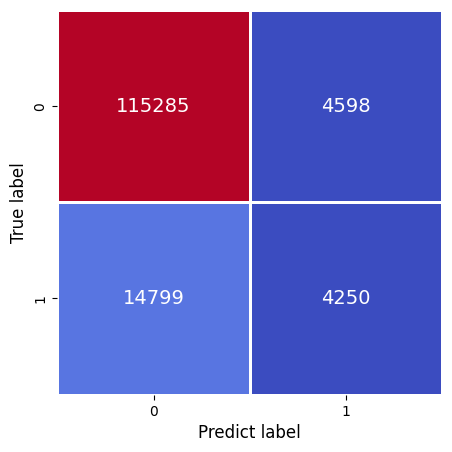

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(
    cm,
    cmap="coolwarm",
    annot=True,
    square=True,
    cbar=False,
    linewidth=1,
    annot_kws={'size': 14},
    fmt='.0f'
)
plt.xlabel('Predict label', size=12)
plt.ylabel('True label', size=12)
plt.show()

In [79]:
# Еще раз обучим модель на всем обучающем датасете 

opt_gbc.fit(X_train, Y_train)

HistGradientBoostingClassifier(class_weight={0: 0.58, 1: 1.46},
                               learning_rate=0.05, random_state=42)

In [80]:
# Оценим качество модели на отложенной выборке

X_test, Y_test = preproc.preprocess_for_predict(test_df)

In [81]:
Y_pred_test = opt_gbc.predict(X_test)
{key:scoring[key](Y_test, Y_pred_test) for key in scoring.keys()}

{'f1_score': 0.31645569620253167,
 'precision': 0.3333333333333333,
 'accuracy': 0.865}

### 3. Выводы

Несмотря на то, что полученная модель смогла выявить определенные паттерны в данных, о чем свидетельствует сравнение с тривиальными алгоритмами, более общие закономерности выявить не удалось. Модель определяет корректно только около трети задержанных вылетов. Снижение только точности на тесте может быть связано с тем, что для теста были вязты данные по последним суткам с неопределенным балансом образцов классов. 

Для улучшения качества модели следует сделать следующие шаги:

1. Собрать больше признаков, которые более явно могут коррелировать с задержками рейса (погода, актуальное тех. состояние ВС, загрузка аэропорта отправления и т. д.)
2. Попробовать другие модели классификации, в том числе нейронные сети
3. Более детально еше раз провести оптимизацию гиперпараметров